In [ ]:
Penjelasan crisp dm

In [ ]:
1. Bussiness Understanding

Di dunia pasar, Diamond adalah aset berharga yang sangat digemari masayarakat
selain untuk dipakai para kaum wanita, maupun laki laki.
Diamond juga bisa sebagai investasi dimasa depan, karena harga yang terus melonjak.
Harga diamond ternyata tidak ada pengaruh dengan berat diamond tersebut.
Tetapi ada pengaruh yang lebih penting yang mempengaruhi harga dan kualitas diamond, yaitu :
4C (cut, carat, clarity dan colour).
Harga diamond biasanya diperbarui sekitar dua minggu sekali, untuk itu kita perlu
Estimasi harga Diamond melalui dataset ini. Agar konsumen bisa prediksi berapa harga Diamond tersebut.


Dataset ini didapat dari kaggle "https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices"

2. Data understanding
Fitur yang mempngaruhi dalam dataset harga diamond untuk mencari harga diamond adalah adalah
karat, potong, warna, kejernihan, panjang, lebar, dan kedalaman

Berikut parameter yang ada didalam dataset ini :
no,carat,cut,color,clarity,depth,table,price,x,y,z
x : length (mm)
y : width (mm)
z : depth (mm)


3. Data preparation
tahap ini melakukan split data training dan data testing
lalu seleksi fitur, fitur apa saja yang dibutuhkan

yang dibutuhkan adalah sebagai berikut :
x : carat,depth,table,x,y,z
y : price

Memilih fitur x dan y alasannya, dalam deskripsi dataset, data yg digunakan hanya numerik
seperti berikut :

 1   carat    53943 non-null  float64
 2   depth    53943 non-null  float64
 3   table    53943 non-null  float64
 4   price    53943 non-null  int64    (y)
 5   x        53943 non-null  float64
 6   y        53943 non-null  float64
 7   z        53943 non-null  float64


4. Modelling
Karena pada tahap selseksi hanya tipe data integer dan float, maka model yg cocok adalah
regression linear, Maka kita akan prediksi harga Diamond dalam bentuk Dollar ($)

5. Evaluasi
setelah modelling selesai yaitu evaluasi, tahap ini diprediksi apakah model yang dipakai benar
Dan di bisa dipercaya, maka membuat tingkat akurasi.TimeoutError
Lalu setelah itu membuat contoh inputan, dan keluar hasil prediksi sesuai tingkat akurasinya.

6. Deployment
Tahap terakhir crisp dm adalah deployment, di deploy ke dalam streamlit
maka analisis sederhana ini selesai, dan siap digunakan

# deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [2]:
df = pd.read_csv('Diamonds.csv')

# Deskripsi Dataset

In [3]:
df.head()

,no,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   no       53943 non-null  int64  
 1   carat    53943 non-null  float64
 2   cut      53943 non-null  object 
 3   color    53943 non-null  object 
 4   clarity  53943 non-null  object 
 5   depth    53943 non-null  float64
 6   table    53943 non-null  float64
 7   price    53943 non-null  int64  
 8   x        53943 non-null  float64
 9   y        53943 non-null  float64
 10  z        53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


<Axes: >

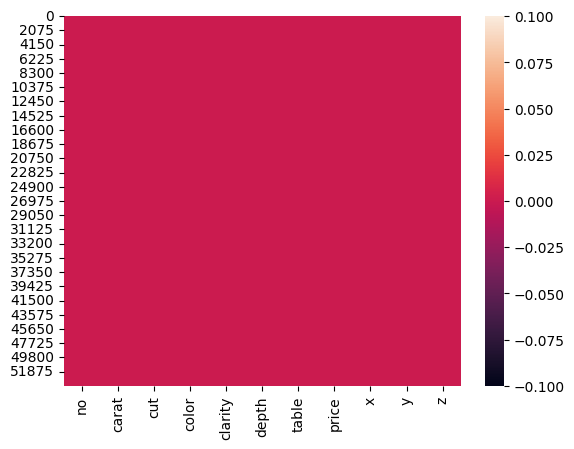

In [5]:
sns.heatmap(df.isnull())

In [33]:
df.describe()

,no,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Visualisasi Data

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_11332\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

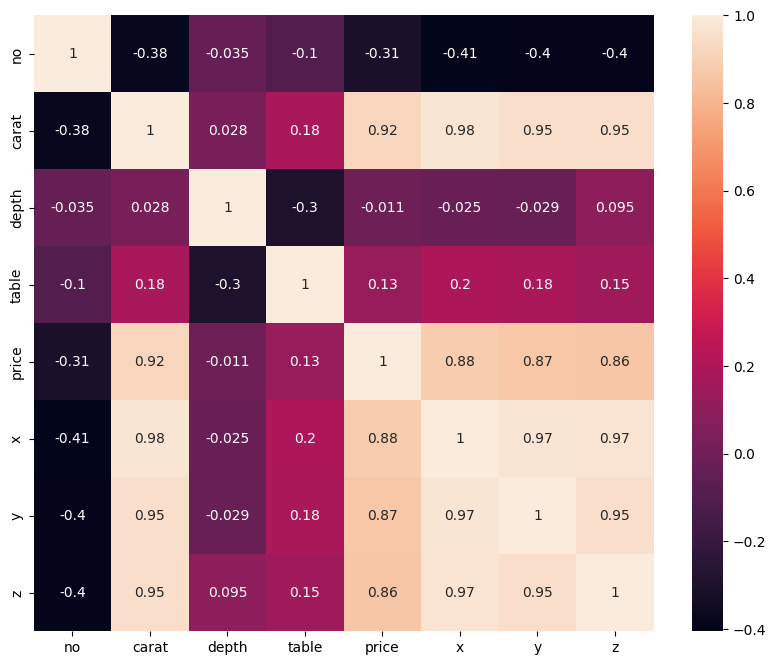

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# carat berdasarkan Color

In [9]:
category = df.groupby('color').count()[['carat']].sort_values(by='carat',ascending=True).reset_index()
category = category.rename(columns={'carat':'Caratcolor'})

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'J'),
  Text(1, 0, 'I'),
  Text(2, 0, 'D'),
  Text(3, 0, 'H'),
  Text(4, 0, 'F'),
  Text(5, 0, 'E'),
  Text(6, 0, 'G')])

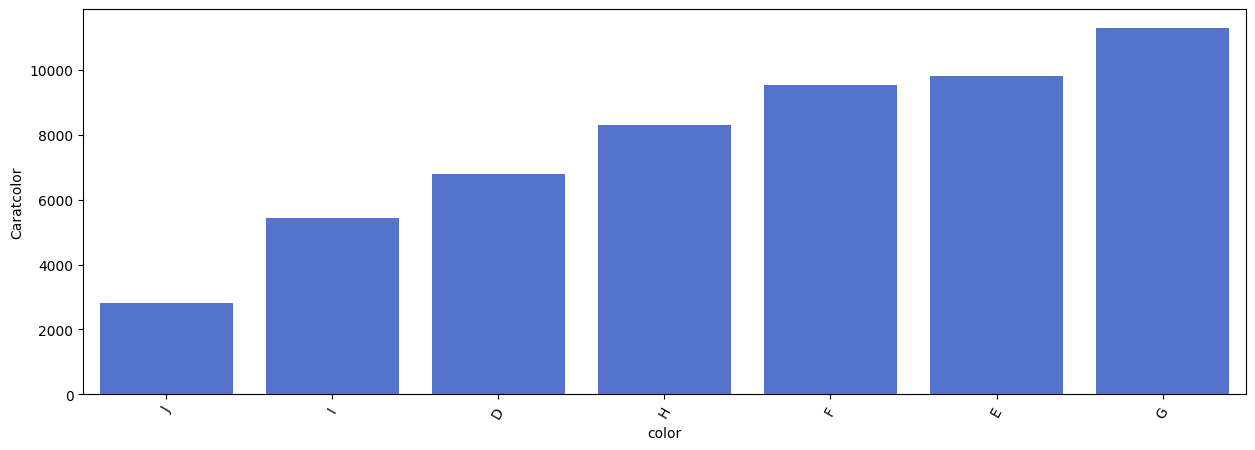

In [10]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=category['color'], y=category['Caratcolor'], color='royalblue')
plt.xticks(rotation=60)

# distribusi Table

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_11332\1593333031.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['table'])


<Axes: xlabel='table', ylabel='Density'>

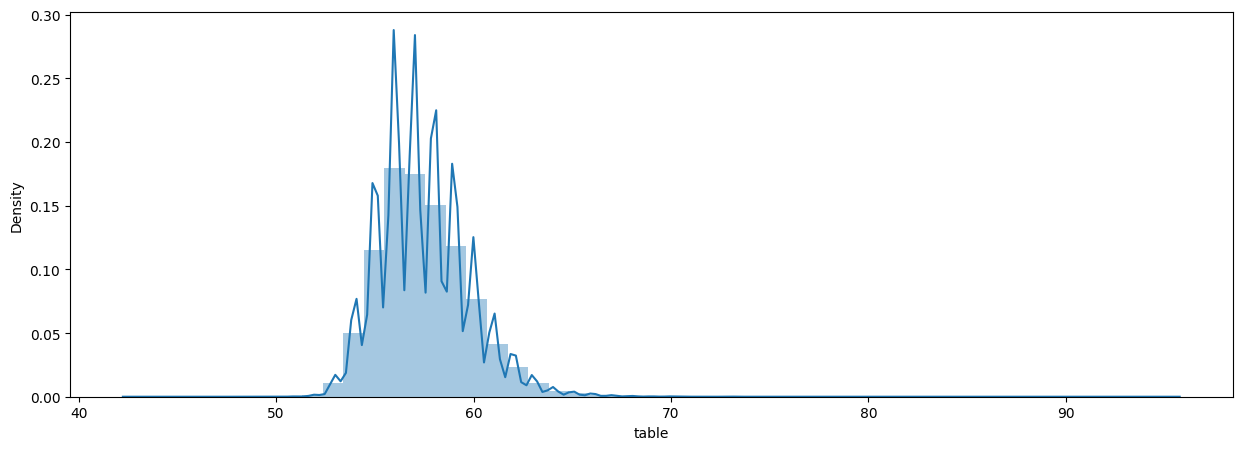

In [11]:
plt.figure(figsize=(15,5))
sns.distplot(df['table'])

# distribusi Price Diamond

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_11332\3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

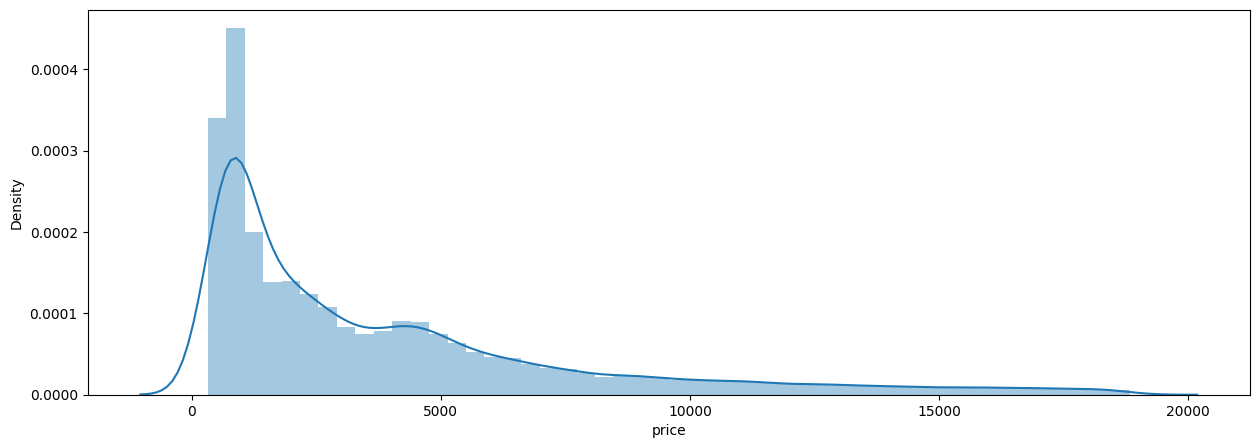

In [14]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

# seleksi fitur

In [15]:
features = ['carat','depth','table','x','y','z']
x = df[features]
y = df['price']
x.shape, y.shape

((53943, 6), (53943,))

# split data training dan data testing

In [16]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(13486,)

# membuat model regresi linier

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [18]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.8645032385895637


# membuat inputan model regresi linier

In [20]:
input_data = np.array([[0.23,61.5,55,3.95,3.98,2.43]])


prediction = lr.predict(input_data) 
print('Estimasi Harga Diamond  :', prediction, '($)')

Estimasi Harga Diamond  : [319.69688147] ($)


c:\Users\Nurthariqa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [21]:
import pickle

filename = 'estimasi_pricediamond.sav'
pickle.dump(lr,open(filename,'wb'))